In [1]:
from fastai2.vision.all import *

In [2]:
path = untar_data(URLs.MNIST)
path.ls()

(#2) [Path('/home/heye0507/.fastai/data/mnist_png/training'),Path('/home/heye0507/.fastai/data/mnist_png/testing')]

In [4]:
TRAIN = Path(path/'training')
TEST = Path(path/'testing')

In [5]:
items = get_image_files(TRAIN)
len(items)

60000

In [6]:
items[:10]

(#10) [Path('/home/heye0507/.fastai/data/mnist_png/training/2/49028.png'),Path('/home/heye0507/.fastai/data/mnist_png/training/2/22070.png'),Path('/home/heye0507/.fastai/data/mnist_png/training/2/21006.png'),Path('/home/heye0507/.fastai/data/mnist_png/training/2/28944.png'),Path('/home/heye0507/.fastai/data/mnist_png/training/2/16857.png'),Path('/home/heye0507/.fastai/data/mnist_png/training/2/30349.png'),Path('/home/heye0507/.fastai/data/mnist_png/training/2/4080.png'),Path('/home/heye0507/.fastai/data/mnist_png/training/2/57956.png'),Path('/home/heye0507/.fastai/data/mnist_png/training/2/36292.png'),Path('/home/heye0507/.fastai/data/mnist_png/training/2/8952.png')]

In [25]:
img = np.array(Image.open(items[0]))
img.shape

(28, 28)

In [105]:
dblock = DataBlock(
    blocks = (ImageBlock(PILImageBW),CategoryBlock),
    get_items = get_image_files,
    get_y = parent_label,
    splitter = RandomSplitter(),
    item_tfms = Resize(28)
)

In [106]:
dls = dblock.dataloaders(TRAIN)

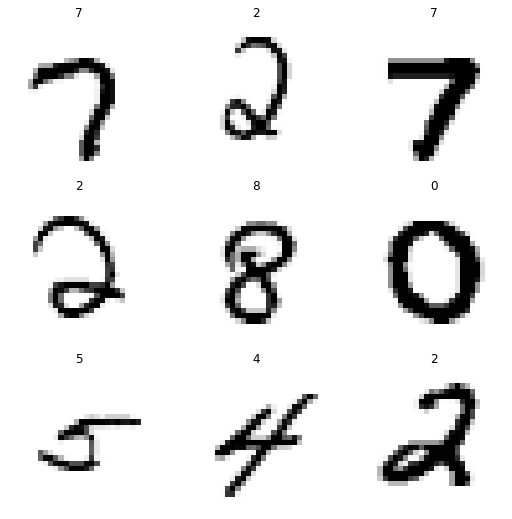

In [107]:
dls.show_batch()

# Pets

In [75]:
pets_path = untar_data(URLs.PETS)
pets_path.ls()

(#2) [Path('/home/heye0507/.fastai/data/oxford-iiit-pet/annotations'),Path('/home/heye0507/.fastai/data/oxford-iiit-pet/images')]

In [77]:
pets_images = Path(pets_path/'images')
pets_images.ls()

(#7393) [Path('/home/heye0507/.fastai/data/oxford-iiit-pet/images/pomeranian_81.jpg'),Path('/home/heye0507/.fastai/data/oxford-iiit-pet/images/British_Shorthair_56.jpg'),Path('/home/heye0507/.fastai/data/oxford-iiit-pet/images/japanese_chin_102.jpg'),Path('/home/heye0507/.fastai/data/oxford-iiit-pet/images/scottish_terrier_76.jpg'),Path('/home/heye0507/.fastai/data/oxford-iiit-pet/images/British_Shorthair_98.jpg'),Path('/home/heye0507/.fastai/data/oxford-iiit-pet/images/wheaten_terrier_21.jpg'),Path('/home/heye0507/.fastai/data/oxford-iiit-pet/images/scottish_terrier_102.jpg'),Path('/home/heye0507/.fastai/data/oxford-iiit-pet/images/British_Shorthair_266.jpg'),Path('/home/heye0507/.fastai/data/oxford-iiit-pet/images/yorkshire_terrier_44.jpg'),Path('/home/heye0507/.fastai/data/oxford-iiit-pet/images/Bengal_60.jpg')...]

In [83]:
pets_images

Path('/home/heye0507/.fastai/data/oxford-iiit-pet/images')

In [87]:
re.findall(r'^(.*)_\d+.jpg$',str(pets_images.ls()[0].name))

['pomeranian']

In [96]:
pets_block = DataBlock(
    blocks = (ImageBlock, CategoryBlock),
    get_items = get_image_files,
    get_y = Pipeline([AttrGetter('name'),RegexLabeller(r'^(.*)_\d+.jpg$')]),
    item_tfms = Resize(128)
)

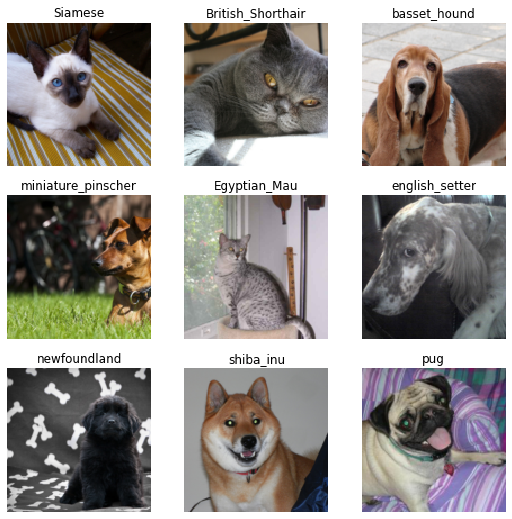

In [97]:
pets_dls = pets_block.dataloaders(pets_images)
pets_dls.show_batch()

In [110]:
pets_dls.train_ds[0]

(PILImage mode=RGB size=500x333, TensorCategory(25))

In [112]:
test_data = pets_dls.one_batch()
type(test_data[0][0])

torch.Tensor

In [113]:
test_data[0][0].shape

torch.Size([3, 128, 128])

# Pascal Multi-label

In [2]:
pascal_path = untar_data(URLs.PASCAL_2007)
pascal_path.ls()

(#8) [Path('/home/heye0507/.fastai/data/pascal_2007/test.json'),Path('/home/heye0507/.fastai/data/pascal_2007/train.csv'),Path('/home/heye0507/.fastai/data/pascal_2007/train'),Path('/home/heye0507/.fastai/data/pascal_2007/test.csv'),Path('/home/heye0507/.fastai/data/pascal_2007/test'),Path('/home/heye0507/.fastai/data/pascal_2007/valid.json'),Path('/home/heye0507/.fastai/data/pascal_2007/train.json'),Path('/home/heye0507/.fastai/data/pascal_2007/segmentation')]

In [4]:
df = pd.read_csv(pascal_path/'train.csv')
df.head()

,fname,labels,is_valid
0,000005.jpg,chair,True
1,000007.jpg,car,True
2,000009.jpg,horse person,True
3,000012.jpg,car,False
4,000016.jpg,bicycle,True


In [5]:
dblock = DataBlock()

In [6]:
dsets = dblock.datasets(df)
dsets.train[0]

(fname         001287.jpg
 labels      horse person
 is_valid           False
 Name: 641, dtype: object,
 fname         001287.jpg
 labels      horse person
 is_valid           False
 Name: 641, dtype: object)

In [3]:
def get_csv_file(path):
    return pd.read_csv(path)

In [9]:
dblock = DataBlock(get_items = get_csv_file)

In [10]:
dsets = dblock.datasets(pascal_path/'train.csv')
dsets.train[0]

(fname        004542.jpg
 labels      person sofa
 is_valid           True
 Name: 2280, dtype: object,
 fname        004542.jpg
 labels      person sofa
 is_valid           True
 Name: 2280, dtype: object)

In [17]:
dsets.train[0][0]['labels'].split(" ")

['person', 'sofa']

In [4]:
def get_label(df_row,label,label_delima):
    return df_row[label].split(label_delima)
    

In [5]:
label_func = partial(get_label,label='labels',label_delima=" ")

In [23]:
dblock = DataBlock(
    get_items = get_csv_file,
    get_y = label_func
)

In [25]:
dsets = dblock.datasets(pascal_path/'train.csv')
dsets.train[0]

(fname       009282.jpg
 labels             car
 is_valid          True
 Name: 4655, dtype: object,
 ['car'])

In [29]:
dsets.train[400]

(fname           005090.jpg
 labels      bus person car
 is_valid             False
 Name: 2552, dtype: object,
 ['bus', 'person', 'car'])

In [38]:
def fix_file_name(df,fname,prefix):
    return prefix/df[fname]

In [6]:
def fix_fname(fname,prefix):
    def _inner(o):
        return prefix/o[fname]
    return _inner

In [39]:
fix_fname = partial(fix_file_name,fname='fname',prefix=pascal_path/'train')

In [7]:
def _test_splitter(col_name):
    def _inner(o):
        mask = o[col_name]
        valid_idx = [i for i,val in enumerate(mask) if val]
        return IndexSplitter(valid_idx)(o[col_name])
    return _inner

In [ ]:
DataBlock()

In [12]:
dblock = DataBlock(
    blocks = (ImageBlock, MultiCategoryBlock),
    get_items = get_csv_file,
    get_x = fix_fname('fname',pascal_path/'train'),
    get_y = label_func,
    splitter = _test_splitter('is_valid'),
    item_tfms = Resize(224),
    batch_tfms = aug_transforms()
)

In [13]:
dsets = dblock.datasets(pascal_path/'train.csv')

In [15]:
dls = dblock.dataloaders(pascal_path/'train.csv')

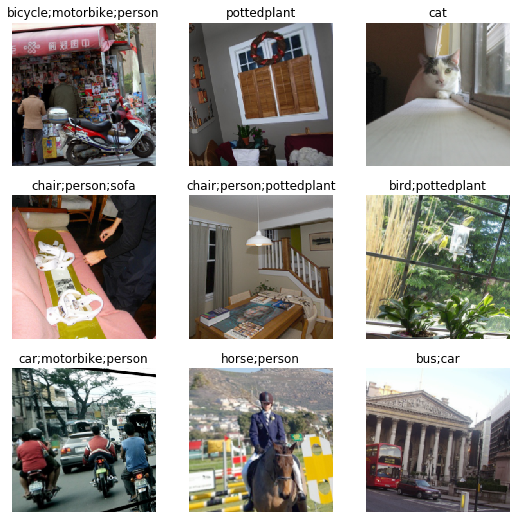

In [16]:
dls.show_batch()

In [46]:
dsets.vocab[dsets.train[0][1] != 0]

(#2) ['person','train']

In [68]:
valid_idx = [i for i,val in enumerate(df['is_valid']) if val]

In [69]:
valid_idx[:10]

[0, 1, 2, 4, 6, 7, 8, 10, 12, 18]

In [71]:
IndexSplitter(valid_idx)(df['is_valid'])

((#2501) [3,5,9,11,13,14,15,16,17,20...], (#2510) [0,1,2,4,6,7,8,10,12,18...])

In [132]:
pascal_dblock = DataBlock(
    blocks = (ImageBlock, MultiCategoryBlock),
    get_x = ColReader('fname',pref=pascal_path/'train'),
    get_y = ColReader('labels',label_delim=' '),
    splitter = ColSplitter(),
    item_tfms = Resize(224),
    batch_tfms= aug_transforms()
)